In [1]:
import numpy as np

In [2]:
def simple_gradient_descent(initial_weighting_vector, data, steps=100, learning_rate=0.05):
    """

    :param initial_weighting_vector: a vector of the form [b, w] where b is the bias and w is history weighing
    :param data: numpy array with N choices in {-1,1}
    :param steps:
    :param learning_rate:
    :return:
    """

    grad_w = []
    
    history_length = len(initial_weighting_vector) - 1
    number_of_data_points = data.shape[0] - history_length
    x_pre = np.ones((history_length + 1, number_of_data_points))
    for i in range(1, history_length + 1):
        x_pre[i, :] = data[i - 1:i + number_of_data_points - 1]

    x_target = data[history_length:]
    
    w = initial_weighting_vector  # initialize descent
    parameter_dependent_lrate = np.ones((2,))
    for i in range(1, steps+1):
        dw = np.dot(x_pre, ((x_target + 1) / 2 - sigmoid(w, x_pre)))
        w += learning_rate * dw
        
        grad_w.append(dw)
                
    return w, grad_w

In [3]:
def momentum_gradient_descent(initial_weighting_vector, data, dw_min=1e-3, steps=100, learning_rate=0.05):
    """

    :param initial_weighting_vector: a vector of the form [b, w] where b is the bias and w is history weighing
    :param data: numpy array with N choices in {-1,1}
    :param steps:
    :param learning_rate:
    :return:
    """

    grad_w = []
    learning = []
    
    history_length = len(initial_weighting_vector) - 1
    number_of_data_points = data.shape[0] - history_length
    x_pre = np.ones((history_length + 1, number_of_data_points))
    for i in range(1, history_length + 1):
        x_pre[i, :] = data[i - 1:i + number_of_data_points - 1]

    x_target = data[history_length:]
    dw_prev = 1e9
    w = initial_weighting_vector  # initialize descent
    gamma = 0.5
    v = np.zeros((len(initial_weighting_vector),))
    for i in range(1, steps+1):
        dw = np.dot(x_pre, ((x_target + 1) / 2 - sigmoid(w, x_pre)))
        v = gamma*v + learning_rate*dw
        w += v
        
        learning.append(learning_rate)
        grad_w.append(dw)
        if np.linalg.norm(dw) < dw_min:
            break
        #elif np.linalg.norm(dw) > dw_prev:
        #    learning_rate = learning_rate/2
        #dw_prev = np.linalg.norm(dw)
                
    return w, grad_w

In [4]:
def gradient_descent(initial_weighting_vector, data, dw_min=1e-3, steps=100, learning_rate=0.05):
    """

    :param initial_weighting_vector: a vector of the form [b, w] where b is the bias and w is history weighing
    :param data: numpy array with N choices in {-1,1}
    :param steps:
    :param learning_rate:
    :return:
    """

    grad_w = []
    learning = []
    
    history_length = len(initial_weighting_vector) - 1
    number_of_data_points = data.shape[0] - history_length
    x_pre = np.ones((history_length + 1, number_of_data_points))
    for i in range(1, history_length + 1):
        x_pre[i, :] = data[i - 1:i + number_of_data_points - 1]

    x_target = data[history_length:]
    dw_prev = 1e9
    w = initial_weighting_vector  # initialize descent
    for i in range(1, steps+1):
        dw = np.dot(x_pre, ((x_target + 1) / 2 - sigmoid(w, x_pre)))
        w += learning_rate * dw
        
        learning.append(learning_rate)
        grad_w.append(dw)
        if np.linalg.norm(dw) < dw_min:
            break
        elif np.linalg.norm(dw) > dw_prev:
            learning_rate = learning_rate/2
        dw_prev = np.linalg.norm(dw)
                
    return w, grad_w, learning

In [5]:
from training_data import generate_stationary_agent_choices,sigmoid

nb_trials = 200
w_gen = np.zeros((2,))
w_gen[1] = -1
initial_choices = np.ones((1,))

data = generate_stationary_agent_choices(nb_trials, w_gen, initial_choices)


w, dw = simple_gradient_descent(np.zeros((2,)),data[:200], 1000, 0.05)


w_gd, dw_gd, learning = gradient_descent(np.zeros((2,)),data[:200], 1e-4, 1000, 0.05)


w_momd, dw_momd = momentum_gradient_descent(np.zeros((2,)),data[:200], 1e-4, 1000, 0.05)


In [6]:
w_gen

array([ 0., -1.])

In [7]:
w

array([-0.42308311, -0.24036962])

In [8]:
w_gd

array([-0.09189129, -0.78503837])

In [9]:
w_momd

array([-0.09189165, -0.78503984])

In [10]:
np.sum(data==1)

97

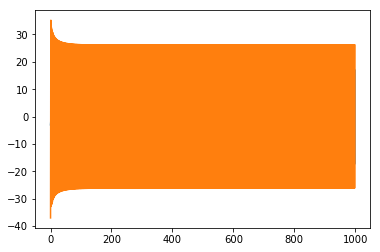

In [11]:
import matplotlib.pyplot as plt

plt.plot(dw)
plt.show()

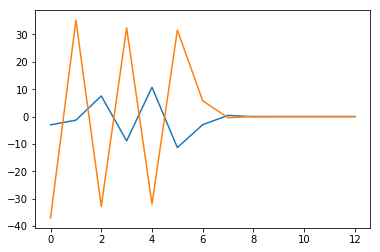

In [12]:
import matplotlib.pyplot as plt

plt.plot(dw_gd)
plt.show()

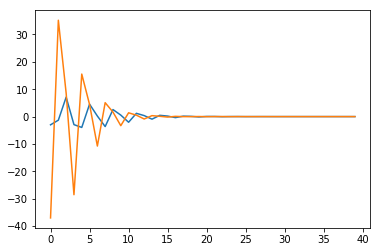

In [13]:
import matplotlib.pyplot as plt

plt.plot(dw_momd)
plt.show()

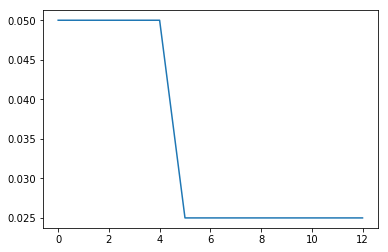

In [14]:
import matplotlib.pyplot as plt

plt.plot(learning)
plt.show()

IndexError: too many indices for array

array([-0.09189165, -0.78503984])